In [2]:
#Necessary imports.

import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [4]:
data = pd.read_csv(r"C:\Users\singh\Files-main\Advertising.csv")
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
data.shape

(200, 5)

In [6]:
data.info() #Printing the summary of the dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
data.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

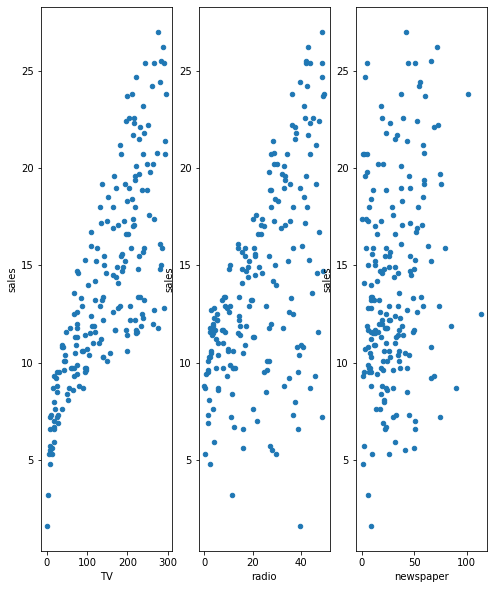

In [8]:
#Visualize the relationship between the features and the response using scatterplots.

fig, axs = plt.subplots(1,3)

data.plot(kind = 'scatter', x = 'TV', y = 'sales', ax = axs[0], figsize = (8,10))

data.plot(kind = 'scatter', x = 'radio', y = 'sales', ax = axs[1])

data.plot(kind = 'scatter', x = 'newspaper', y = 'sales', ax = axs[2])

fig.savefig('testdata.jpg')


In [9]:
#Create X = Feature and Y = Label

X = data[['TV']]
Y = data.sales

#follow the usual sklearn pattern: import instance, fit

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X,Y)


LinearRegression()

In [10]:
#Print intercept and coefficient

print(lm.intercept_)
print(lm.coef_)

7.032593549127693
[0.04753664]


In [11]:
#Let's create a DataFrame since the model expects it.

X_new = pd.DataFrame({'TV':[50]})

X_new.head()

,TV
0,50


In [12]:
#Use the model to make predictions on a new value.

lm.predict([[50]])

array([9.40942557])

In [14]:
#Print the p-values for the model coefficients.

import statsmodels.formula.api as smf

lm = smf.ols(formula = 'sales ~ TV', data = data).fit()

lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [16]:
#print the R square value of the model

from sklearn.metrics import r2_score

In [17]:
# Create X and Y

x = data[['TV', 'radio','newspaper']]
y = data.sales

lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

In [18]:
#Print intercept and coeffciencts

print('Intercept:- ', lm.intercept_)
print('TV:- ', lm.coef_[0])
print('Radio:- ', lm.coef_[1])
print('Newspaper:- ', lm.coef_[2])

Intercept:-  2.9388893694594085
TV:-  0.045764645455397615
Radio:-  0.18853001691820448
Newspaper:-  -0.0010374930424763007


In [20]:
lm = smf.ols(formula = 'sales ~ TV + radio + newspaper', data = data).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           1.58e-96
Time:                        18:41:01   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
#Only include Tv and radio in the model

lm = smf.ols(formula = 'sales ~ TV + radio', data = data).fit()
lm.rsquared

0.8971942610828957

In [23]:
#Add newspaper to the model which believe has no association with sales.

lm = smf.ols(formula = 'sales ~ TV + radio + newspaper', data = data).fit()
lm.rsquared

0.8972106381789521

In [26]:
#Project 1 with Linear Regression.
#Let's import necessary libraries.

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [27]:
#Read CSV file and convert into dataframe

data = pd.read_csv(r"C:\Users\singh\Files-main\Admission_Prediction.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [28]:
#Understand data at high level. Check the statistics of data set

data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [29]:
#Fill the null values

data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])

data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())

data['GRE Score'] = data['GRE Score'].fillna(data['GRE Score'].mean())

In [30]:
#verify if the NaN values are filled.

data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [31]:
#Dropping unwanted columns

data = data.drop(columns = ['Serial No.'])

data.head()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


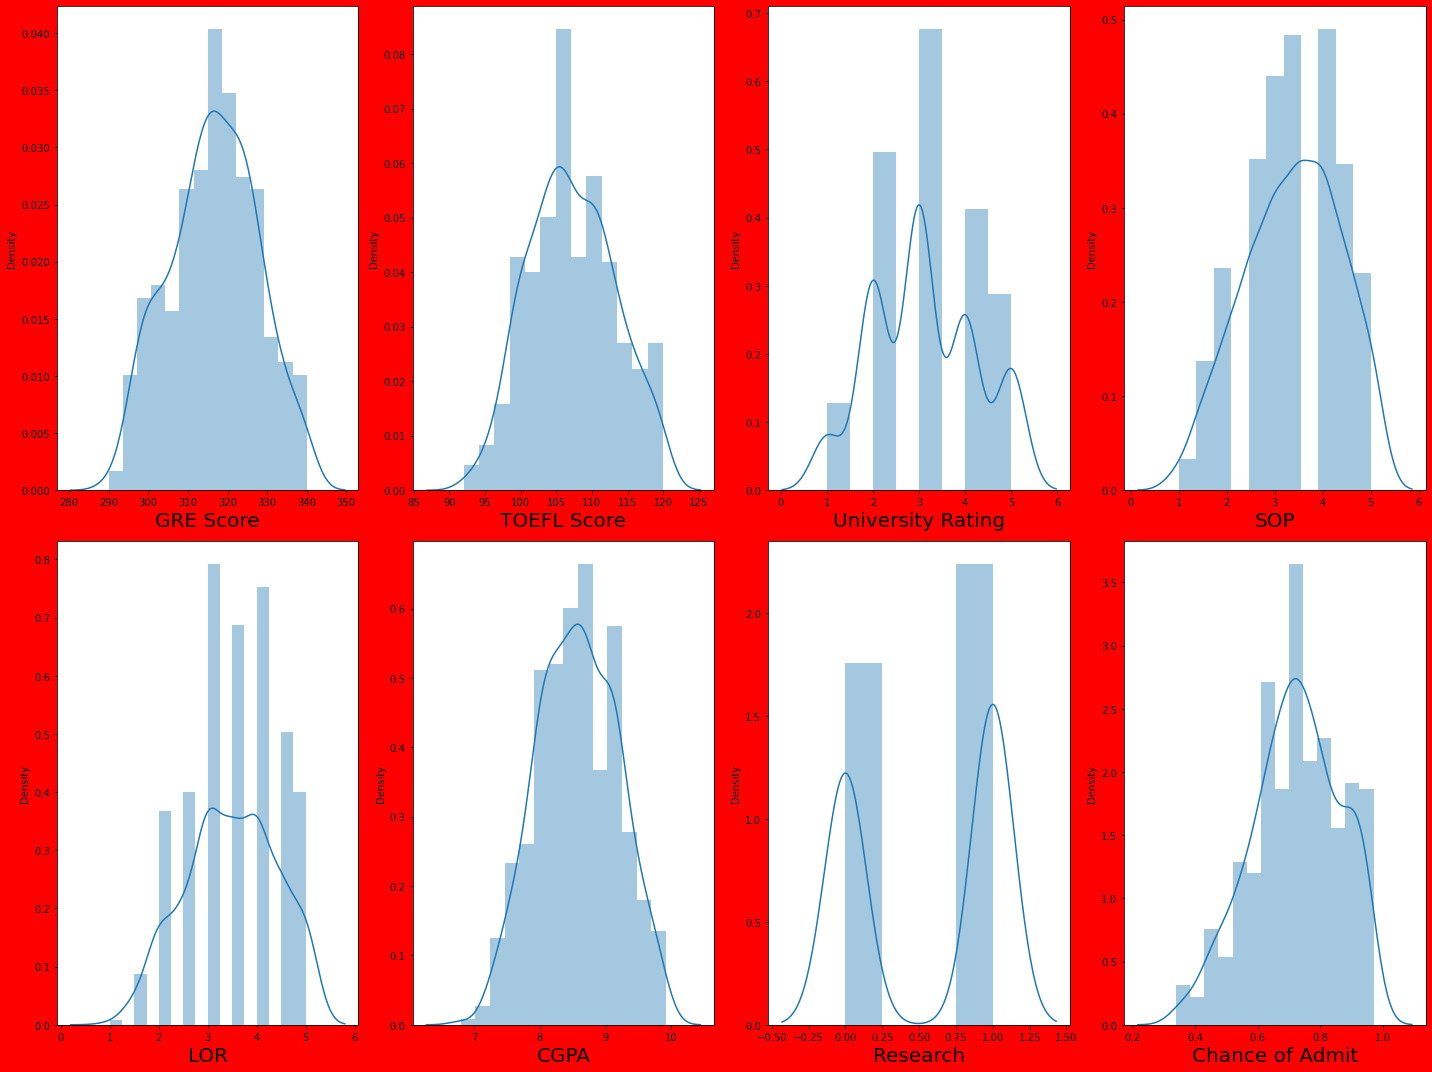

In [32]:
#Let's see how data is distributed for every feature

plt.figure(figsize = (20,15), facecolor = 'red')

plotnumber = 1

for column in data:
    if plotnumber <= 8:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 20)
        
    plotnumber += 1
    
plt.tight_layout()

In [33]:
#Devide datasets into features and label

y = data['Chance of Admit']
x = data.drop(columns = ['Chance of Admit'])

In [34]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1
496,337.000000,117.0,5.0,5.0,5.0,9.87,1
497,330.000000,120.0,5.0,4.5,5.0,9.56,1
498,312.000000,103.0,4.0,4.0,5.0,8.43,0


In [35]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

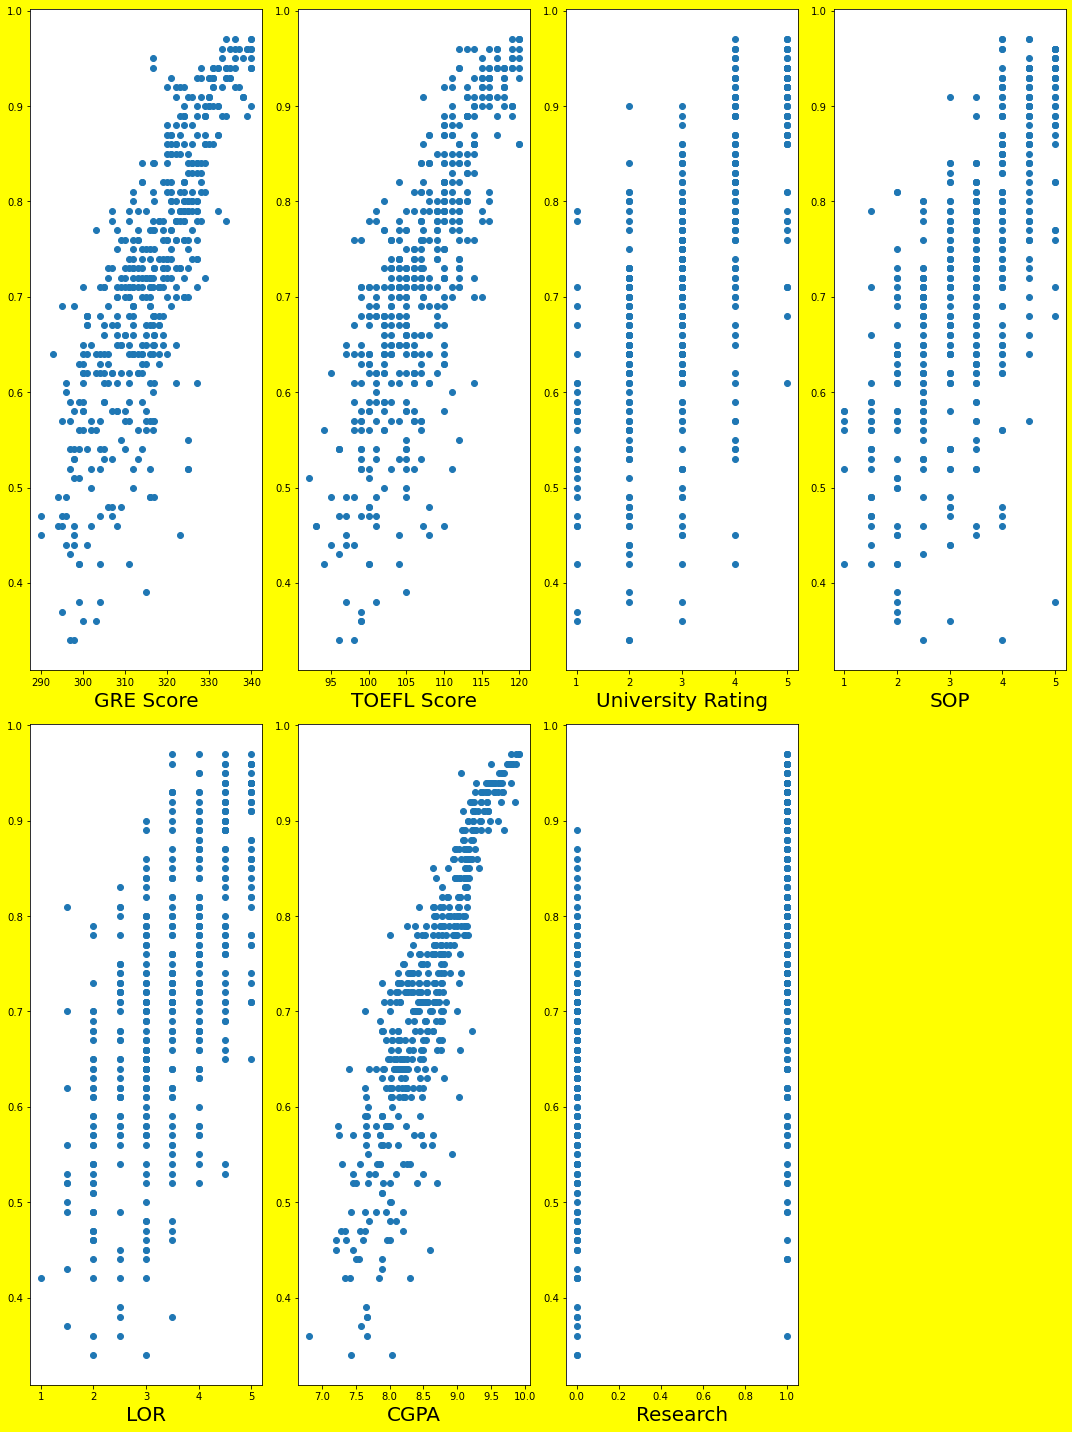

In [36]:
#Visualizing relationship

plt.figure(figsize = (15,20), facecolor = 'yellow')

plotnumber = 1

for column in x:
    if plotnumber <= 8:
        ax = plt.subplot(2,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column, fontsize = 20)
        
    plotnumber += 1
    
plt.tight_layout()

In [37]:
#Data scaling formula z= (x-mean)/std

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

x_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [38]:
#Split data into train and test. Model will be built on traning data and tested on test data.

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 49900)

y_train.head()

287    0.89
473    0.67
125    0.64
382    0.82
429    0.95
Name: Chance of Admit, dtype: float64

In [40]:
#Model instantiating and training

regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [41]:
#Predict the chance of admission give features

data.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [43]:
#Since we have already fit the scaler, you can transform the data.

print('Chance of Admission is: ', regression.predict(scaler.transform([[327.0,113.0,4.0,4.5,9.04,0,0]])))

Chance of Admission is:  [-0.17491339]


In [44]:
#Saving the model to the local file system
#filename = 'Finalized_model.pickle'

pickle.dump(regression,open('reg_model','wb'))

In [47]:
#Prediction using the saved model

loaded_model = pickle.load(open('reg_model','rb'))

a = loaded_model.predict(scaler.transform([[314,103,2,2,8.21,9.4,0]]))

a

array([0.84060981])

In [48]:
#Let's check how well model fits on train data

#Adjusted R2 score

regression.score(x_train,y_train)

0.8146992645559842

In [49]:
#Let's check how well model fits on test data

#Adjusted R2 score

regression.score(x_test,y_test)

0.8259313277965625

In [50]:
#Let's plot and visulazie

y_pred = regression.predict(x_test)

y_pred

array([0.7200007 , 0.93718261, 0.6112247 , 0.91653049, 0.84141872,
       0.51535771, 0.65076906, 0.74531699, 0.93307122, 0.62392919,
       0.78655516, 0.86169632, 0.86219343, 0.73297963, 0.78514101,
       0.66997304, 0.73676248, 0.90686775, 0.87539167, 0.79537352,
       0.70833371, 0.71808303, 0.53377671, 0.88570922, 0.55083638,
       0.80525707, 0.53450855, 0.65196608, 0.59316612, 0.45713528,
       0.50911256, 0.56180289, 0.61198211, 0.88792528, 0.94595084,
       0.85851877, 0.77767805, 0.8004644 , 0.79814035, 0.89482017,
       0.65128082, 0.75734935, 0.78783582, 0.79574576, 0.65301168,
       0.83740106, 0.88057861, 0.65391321, 0.63178298, 0.63697129,
       0.53575054, 0.63051193, 0.57907935, 0.50518921, 0.48330234,
       0.71137085, 0.65630336, 0.62106916, 0.78707589, 0.92234439,
       0.69856085, 0.82199079, 0.51491012, 0.92725711, 0.63297926,
       0.70133095, 0.63825289, 0.90562029, 0.93490876, 0.84572671,
       0.69632017, 0.65365083, 0.82556306, 0.69828257, 0.72343

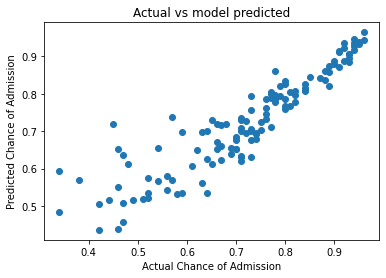

In [51]:
plt.scatter(y_test,y_pred)

plt.xlabel('Actual Chance of Admission')
plt.ylabel('Predicted Chance of Admission')
plt.title('Actual vs model predicted')

plt.show()

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [55]:
y_pred = regression.predict(x_test)

In [57]:
#MAE

mean_absolute_error(y_test,y_pred)




0.04322028994979749

In [58]:
#MSE

mean_squared_error(y_test,y_pred)


0.004104326509012153

In [59]:
#RMSE

np.sqrt(mean_squared_error(y_test,y_pred))

0.0640650178257382

In [61]:
#LASSO CV will return best alpha after max iteration

#Normalize is subastracting the mean and deviding by the l2 form

from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [62]:
lasscv = LassoCV(alphas = None, max_iter = 100, normalize = True)

lasscv.fit(x_train, y_train)

LassoCV(max_iter=100, normalize=True)

In [63]:
#Best alpha parameter

alpha = lasscv.alpha_

alpha

2.683839470791169e-05

In [65]:
#Now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)

lasso_reg.fit(x_train, y_train)


Lasso(alpha=2.683839470791169e-05)

In [66]:
lasso_reg.score(x_test,y_test)

0.8259009648446302

In [69]:
#RidgeCV will return best alpha and coefficients after performing 10 cross validation

ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True)

ridgecv.fit(x_train,y_train)

ridgecv.alpha_

0.011

In [70]:
ridge_model = Ridge(alpha = ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

ridge_model.score(x_test,y_test)

0.8259296134070377